<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Признаки</a></span></li><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Целевой признак</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных

### Признаки

_**RowNumber**_ — индекс строки в данных  
_**CustomerId**_ — уникальный идентификатор клиента  
_**Surname**_ — фамилия  
_**CreditScore**_ — кредитный рейтинг  
_**Geography**_ — страна проживания  
_**Gender**_ — пол  
_**Age**_ — возраст  
_**Tenure**_ — сколько лет человек является клиентом банка  
_**Balance**_ — баланс на счёте  
_**NumOfProducts**_ — количество продуктов банка, используемых клиентом  
_**HasCrCard**_ — наличие кредитной карты  
_**IsActiveMember**_ — активность клиента  
_**EstimatedSalary**_ — предполагаемая зарплата

### Целевой признак

_**Exited**_ — факт ухода клиента


## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, recall_score
import itertools
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from plot_metric.functions import BinaryClassification
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import normaltest
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('datasets/Churn.csv')  # Локальный путь
except:
    data = pd.read_csv('Churn.csv')  # Серверный путь
#data = pd.read_csv('Churn.csv')

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Предварительно, нужно точно избавиться от столбца **RowNumber** - не является фичей для нашего целевого признака.  
Нет смысла использовать в нашей модели такие фичи, как:  
_**CustomerId**_ - уникальный идентификатор клиента  
_**Surname**_ - фамилия клиента  
Данные фичи уникальные для каждого клиента, и точно не могут предсказать уйдет ли клиент.  
Удалим эти фичи.

In [4]:
data.drop(columns={'RowNumber', 'Surname', 'CustomerId'}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [6]:
data.Tenure.mean()

4.997690023099769

In [7]:
data.Tenure.median()

5.0

_**EstimatedSalary**_ и _**Balance**_ стоит округлить до int, нет смысла во float значениях зарплаты, остатка на счете.  
_**Tenure**_ - сколько лет человек является клиентом банка стоит также округлить до int, предварительно заменив NuN на медиану. Скорее всего, произошел какой-то сбой, из-за которого 909 объектов не учли.

In [8]:
data.EstimatedSalary=data.EstimatedSalary.astype(int)
data.Balance=data.Balance.astype(int)

In [9]:
data.Tenure.fillna(data.Tenure.median(), inplace=True)

In [10]:
data.Tenure=data.Tenure.astype(int)

In [11]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Преобразуем _**Geography**_ и _**Gender**_ с помощью OHE.

In [12]:
data = pd.concat([data, pd.get_dummies(data['Geography'], drop_first=True)], axis=1).drop(columns='Geography')
data = pd.concat([data, pd.get_dummies(data['Gender'], drop_first=True)], axis=1).drop(columns='Gender')
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0


In [13]:
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0


Посмотрим, есть ли дубликаты.

In [14]:
data.duplicated().sum()

0

Разделим выборку на три части:

In [15]:
#С помощью train_test_split Разделим наш датасет на следующие выборки 
data_train, data_valid = train_test_split(data, test_size=0.4, random_state=12345)
data_valid, data_test = train_test_split(data_valid,test_size = 0.5, random_state=12345)
print('Размер обучающей выборки:', data_train.shape[0],'объектов')
print('Размер валидационной выборки:', data_valid.shape[0],'объекта')
print('Размер тестовой выборки:',data_test.shape[0],'объекта')

Размер обучающей выборки: 6000 объектов
Размер валидационной выборки: 2000 объекта
Размер тестовой выборки: 2000 объекта


Стандатизируем наш датасет - отдельно трейн, вэлид и тест c помощью MinMaxScaler - мне кажется это более логичным подходом, чем подход основанный на предположении о том, что распределение выборки нормальное.

In [16]:
scaler = MinMaxScaler()
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for data in [data_train, data_valid, data_test]:
    scaler.fit(data[numeric])
    data[numeric] = scaler.transform(data[numeric])

In [17]:
train_features = data_train.drop(columns=['Exited'])
train_target = data_train.Exited

valid_features = data_valid.drop(columns=['Exited'])
valid_target = data_valid.Exited

test_features = data_test.drop(columns=['Exited'])
test_target = data_test.Exited

### Вывод

- Избавились от столбца **RowNumber** - индекс нет смысла использовать как фичу.
- Убрали следующие фичи:
_**CustomerId**_ - уникальный идентификатор клиента  
_**Surname**_ - фамилия клиента  
Данные фичи уникальные для каждого клиента, и точно не могут предсказать уйдет ли клиент.  
- _**EstimatedSalary**_ и _**Balance**_ округлили до int, нет смысла во float значениях зарплаты, остатка на счете.  
- _**Tenure**_ - сколько лет человек является клиентом банка также округлили до int, предварительно заменив NuN на медиану. Скорее всего, произошел какой-то сбой, из-за которого 909 объектов не учли.  
- Преобразовали _**Geography**_ и _**Gender**_ с помощью OHE, избавившись от коллинеарности.
- Стандатизировали выборку.
- Дубликатов нет.
- Разделили выборку на трейн, валидацию и тест.

## Исследование задачи

Проверим данные на нормальность.

In [18]:
for x in data.columns:
    print(normaltest(data[x]))

NormaltestResult(statistic=26.513133805574093, pvalue=1.7488241628767493e-06)
NormaltestResult(statistic=318.75564960301267, pvalue=6.068622891479982e-70)
NormaltestResult(statistic=402.5595285873389, pvalue=3.848655589588582e-88)
NormaltestResult(statistic=12500.066116725835, pvalue=0.0)
NormaltestResult(statistic=141.02684994630474, pvalue=2.3790777430464087e-31)
NormaltestResult(statistic=2613.7700672825335, pvalue=0.0)
NormaltestResult(statistic=7164.468254873765, pvalue=0.0)
NormaltestResult(statistic=968.6529126689018, pvalue=4.567647432248183e-211)
NormaltestResult(statistic=389.31175700258206, pvalue=2.897517695002726e-85)
NormaltestResult(statistic=393.84662522810305, pvalue=3.001179516120543e-86)
NormaltestResult(statistic=391.5396515130518, pvalue=9.511411050161116e-86)
NormaltestResult(statistic=7376.517855925206, pvalue=0.0)


Значит, в дальшейшем строим корреляцию по Спирмену для расчета корреляций.

Построим scatter_plots для наших данных.

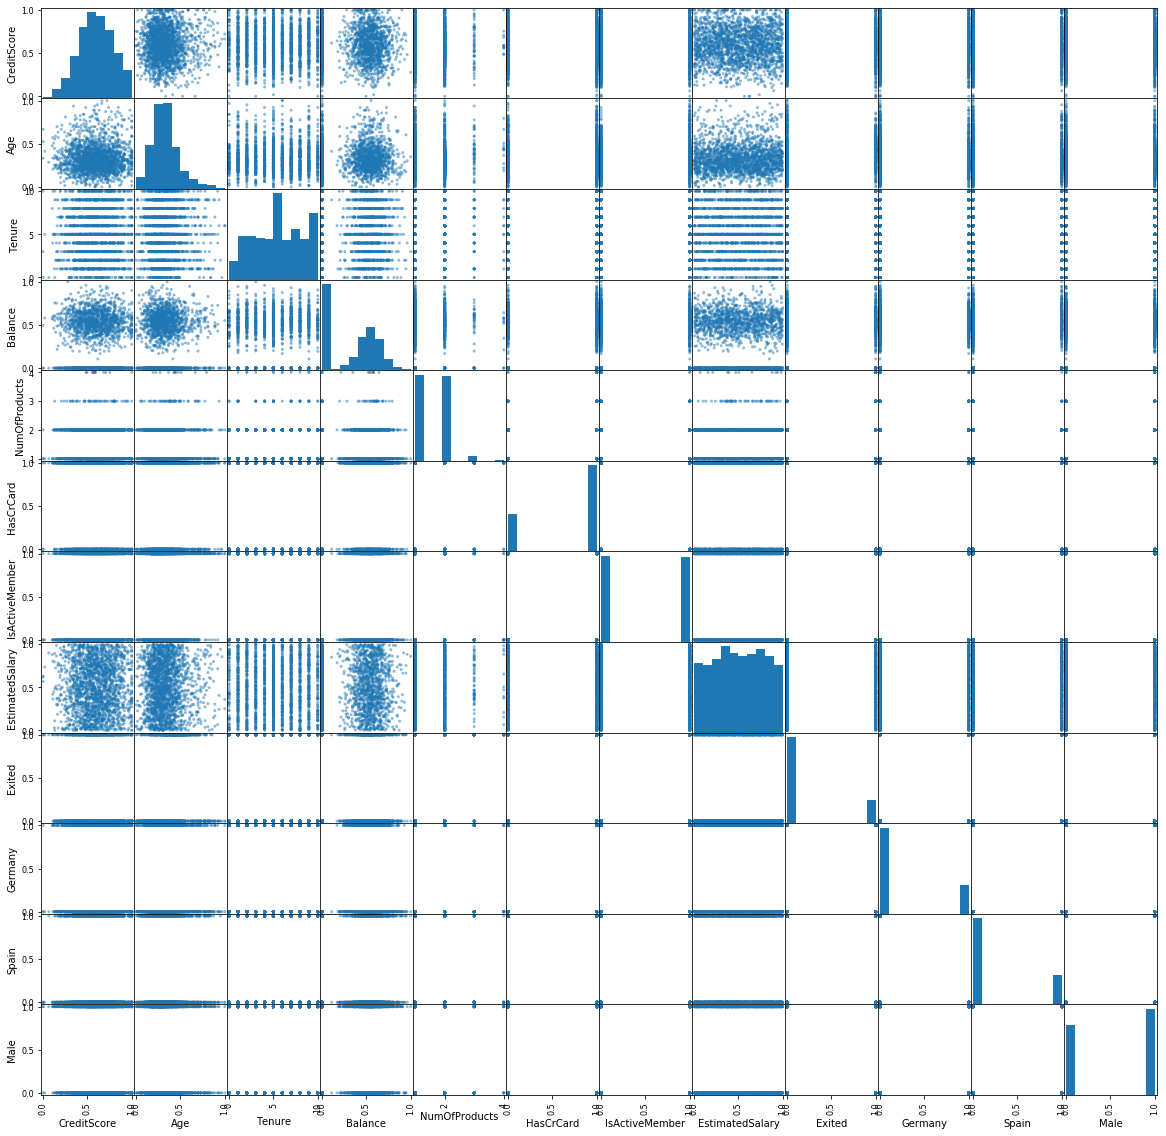

In [19]:
pd.plotting.scatter_matrix(data, figsize = (20,20))
plt.show()

 Судя по scatter_plots - явных зависимостей нет.

Нулевая гипотеза о принадлежности к нормальному распределению отвергается для всех фичей.  
Значит, используем корреляцию по Спирмену.

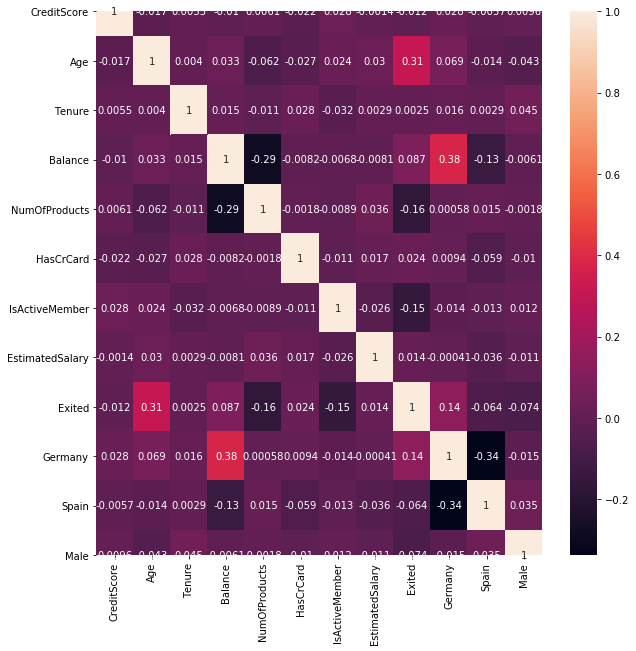

In [20]:
corrMatrix = data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(corrMatrix, annot=True)
plt.show()

По корреляционной матрице видим, что мультиколлинеарности нет.

Рассмотрим баланс классов.

In [21]:
print('Количество 0 в Exited =',data[data['Exited']==0].count()[0])
print('Количество 1 в Exited =',data[data['Exited']==1].count()[0])

Количество 0 в Exited = 1577
Количество 1 в Exited = 423


Выборка несбалансированна.

Рассмотрим модель RandomForestClassifier со стандартными параметрами, без учета дисбаланса - посмотрим какой accuracy и F1 покажет модель.

In [22]:
model = RandomForestClassifier(random_state=12345)
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print('Accuracy is:', accuracy_score(predicted_valid, valid_target))
print('F1_Score is:', f1_score(valid_target, predicted_valid))

Accuracy is: 0.8575
F1_Score is: 0.5739910313901345


Рассмотрим модель LogisticRegression со стандартными параметрами, без учета дисбаланса - посмотрим какой accuracy и F1 покажет нам модель.

In [23]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print('Accuracy is:', accuracy_score(predicted_valid, valid_target))
print('F1_Score is:', f1_score(valid_target, predicted_valid))

Accuracy is: 0.803
F1_Score is: 0.3276450511945393


### Вывод
- Мультиколлинеарности нет.
- Класс не сбалансирован.
- Используем Случайный лес в качестве модели, так как первоначально без учета дисбаланса, случайный лес работает лучше со стандартными параметрами.

## Борьба с дисбалансом

Попробуем настроить параметры для Случайного леса применив class_weight='balanced'

In [24]:
f1 = 0
depth_max = 0
estimator_max = 0
accuracy_max = 0
for depth in range(1,10):
    for estimator in range(1,100,5):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator, class_weight='balanced')
        model.fit(train_features, train_target)
        predicted_valid = model.predict(valid_features)
        score = accuracy_score(valid_target, predicted_valid)
        fscore = f1_score(valid_target, predicted_valid)
        if fscore>f1:
            f1 = fscore
            depth_max=depth
            estimator_max= estimator
            accuracy_max = score
print('Depth: {: >5.0f}       |   Estimators: {:>5.0f}'.format(depth_max, estimator_max))
print('Accuracy: {: >5.3f}   |   F1_Score: {: >5.3f}'.format(accuracy_max,f1))

Depth:     8       |   Estimators:    16
Accuracy: 0.829   |   F1_Score: 0.623


Из всех моделей я выбрала модель с самым высоким F1score  
Depth = 9; Estimators = 76  
Accuracy = 0.841; **F1score** = 0.634

Увеличим выборку, тем самым справимся с дисбалансом классов и попробуем увеличить F1score:

In [25]:
def upsampling(train_features, train_target, repeat):
    X_zeros = train_features[train_target == 0]
    X_ones = train_features[train_target == 1]
    y_zeros = train_target[train_target == 0]
    y_ones = train_target[train_target == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

In [26]:
f1score_max = 0
depth_model = 0
estimator_model = 0
repeat_model = 0
accuracy = 0
for repeat in range(1,5):
    for depth in range(1,10):
        for estimator in range(1,80,5):
            X_upsampled, y_upsampled = upsampling(train_features, train_target, repeat)
            model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
            model.fit(X_upsampled, y_upsampled)
            predictions = model.predict(valid_features)
            if f1_score(valid_target, predictions) > f1score_max:
                f1score_max = f1_score(valid_target, predictions)
                depth_model = depth
                estimator_model = estimator
                repeat_model = repeat
                accuracy = accuracy_score(valid_target, predictions)
print("F1_Score: {: >5.3f}  |   Repeats : {: >5.0f}|   Depth : {: >5.0f}|   Estimator : {: >5.0f}|   Accuracy : {: >5.3f}".format(
    f1score_max, repeat_model, depth_model,estimator_model, accuracy))

F1_Score: 0.640  |   Repeats :     3|   Depth :     6|   Estimator :    66|   Accuracy : 0.842


Наилучшая модель с Depth = 6; Estimator = 66; Repeats = 3  
Accuracy = 0.844; **F1score** = 0.64

Попробуем обучить нашу модель с помощью уменьшения выборки.

In [27]:
def downsampling(train_features, train_target, fraction):
    X_zeros = train_features[train_target == 0]
    X_ones = train_features[train_target == 1]
    y_zeros = train_target[train_target == 0]
    y_ones = train_target[train_target == 1]
    X_downsampled = pd.concat(
        [X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat(
        [y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

In [28]:
f1score_max = 0
depth_model = 0
estimator_model = 0
fraction_model = 0
accuracy = 0
for fraction in np.arange (0.05,0.6, 0.05):
    for depth in range(1,10):
        for estimator in range(1,50,5):
            X_downsampled, y_downsampled = downsampling(train_features, train_target, fraction)
            model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
            model.fit(X_downsampled, y_downsampled)
            predictions = model.predict(valid_features)
            if f1_score(valid_target, predictions) > f1score_max:
                f1score_max = f1_score(valid_target, predictions)
                depth_model = depth
                estimator_model = estimator
                fraction_model = fraction
                accuracy = accuracy_score(valid_target, predictions)
print("F1_Score: {: >5.3f}  |   Fraction : {: >5.2f}|   Depth : {: >5.0f}|   Estimator : {: >5.0f}|   Accuracy : {: >5.3f}".format(f1score_max, fraction_model, depth_model, estimator_model, accuracy))

F1_Score: 0.630  |   Fraction :  0.50|   Depth :     9|   Estimator :    46|   Accuracy : 0.856


Наилучшая модель с Depth = 9; Estimators = 46; Fraction = 0.5  
Accuracy = 0.856; **F1score** = 0.63

### Вывод:
- Через цикл методом подбора количества деревьев и глубины леса подобрали нужные параметры.  
Выявили лучшие параметры : Глубина = 9, Количество деревьев = 76. F1 score показал 0.634
- Попробовали улучшить модели путем увеличения и уменьшения выборок:
Увеличели F1 score до 0.64 увеличением выборки. Глубина дерева = 6, Количество деревьев = 66


## Тестирование модели

Протестим нашу лучшую модель на тестовой выборке с соответствующими параметрами, обучив на трейн+вэлид.

In [29]:
features = pd.concat([train_features, valid_features])
target = pd.concat([train_target, valid_target])

In [30]:
X_upsampled, y_upsampled = upsampling(features, target, 3)
model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=66)
model.fit(X_upsampled, y_upsampled)
predictions = model.predict(test_features)
accuracy_test = accuracy_score(predictions, test_target)
recall_test = recall_score(predictions, test_target)
print('Accuracy is:{: >5.3f}'.format(accuracy_test))
print('Recall is:{: >5.3f}'.format(recall_test))
print("F1_Score: {: >5.2f}".format(f1_score(predictions, test_target)))

Accuracy is:0.789
Recall is:0.501
F1_Score:  0.58


F1_score на тестовых данных маловат. Попробуем проверить обычную нашу модель на тестовой выборке.

In [31]:
model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=76, class_weight='balanced')
model.fit(features, target)
predictions = model.predict(test_features)
accuracy_test = accuracy_score(predictions, test_target)
recall_test = recall_score(predictions, test_target)
print('Accuracy is:', accuracy_test)
print('Recall is:{: >5.3f}'.format(recall_test))
print("F1_Score: {: >5.2f}".format(f1_score(predictions, test_target)))

Accuracy is: 0.798
Recall is:0.516
F1_Score:  0.60


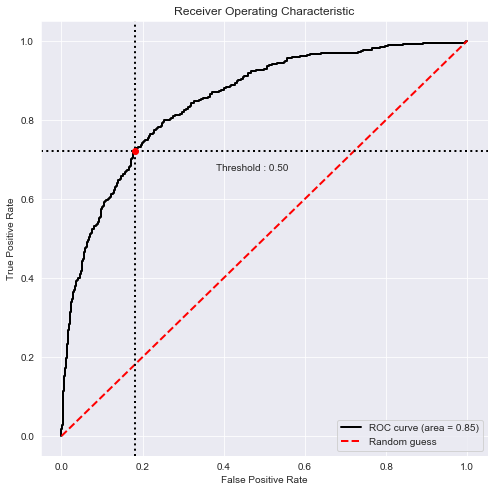

                       Roc Auc Score is: 0.848


In [32]:
#Отрисуем ROC Кривую
y_pred = model.predict_proba(test_features)[:,1]
bc = BinaryClassification(test_target, y_pred, labels=["Class 1"])
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()
print('                       Roc Auc Score is: {:.3f}'.format(roc_auc_score(test_target, y_pred)))


Посмотрим, какие фичи важны для построения модели.

In [33]:
importances = model.feature_importances_

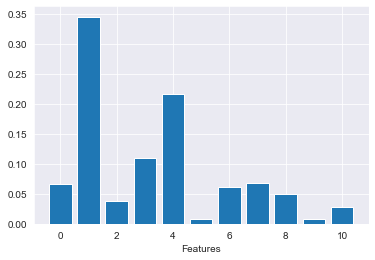

In [34]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xlabel('Features')
plt.show()

In [35]:
features.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

Больше всего на факт ухода клиента влияет возраст, количество продуктов банка, используемых клиентом и остаток денег на счету клиента.

## Общий вывод:
- Подготовили датасет.
- Построили две модели без учета дисбаланса: RandomForestClassifier и LogisticRegression, где LogisticRegression показал наихудшие результаты, поэтому мы выбрали RandomForestClassifier для дальнейшей работы.
- Попробовали увеличить и уменьшить выборки для увеличения f1_score, наибольшее f1_score = 0.64 получили посредством увеличения выборки.
- Получили Roc auc score = 843 для лучшей модели RandomForestClassifier с весами "balanced" на тестовой выборки, что значительно больше случайного порога в 0.5. Модель предсказывает неплохо.
- Больше всего на факт ухода клиента влияет возраст, количество продуктов банка, используемых клиентом и остаток денег на счету клиента.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*